In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("mxmh_survey_results.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

# Respondents' background

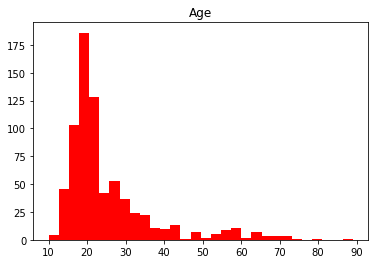

In [4]:
df.hist(['Age'], bins = 30, color = 'Red', grid = False)
plt.savefig("age hist")

In [5]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [6]:
df['Age'].value_counts().loc[lambda x: x>50]

18.0    85
19.0    61
17.0    59
21.0    52
Name: Age, dtype: int64

In [7]:
df['Age'].max()

89.0

In [8]:
service = df['Primary streaming service'].value_counts()

Text(0, 0.5, ' ')

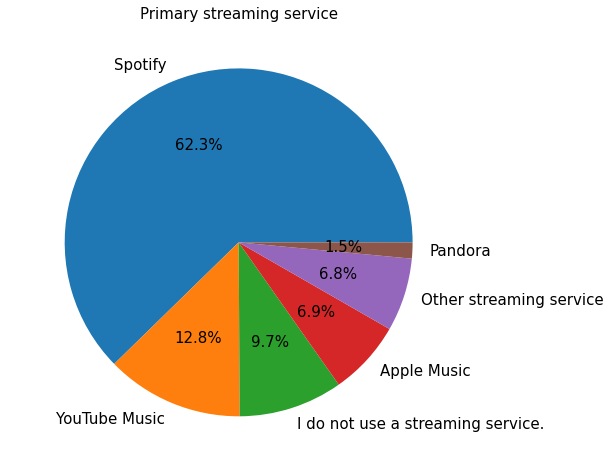

In [9]:
service.plot(kind = 'pie', autopct='%1.1f%%', figsize=(20,8), fontsize = 15)
plt.title("Primary streaming service", fontsize = 15)
plt.ylabel(" ")

In [10]:
df['Primary streaming service'].value_counts(normalize = True)

Spotify                              0.623129
YouTube Music                        0.127891
I do not use a streaming service.    0.096599
Apple Music                          0.069388
Other streaming service              0.068027
Pandora                              0.014966
Name: Primary streaming service, dtype: float64

In [11]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [12]:
df.shape

(736, 33)

In [13]:
import seaborn as sns
df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],['Other', 'none', 'Youtube'], inplace = True)

Text(0.5, 1.0, 'Streaming sevices')

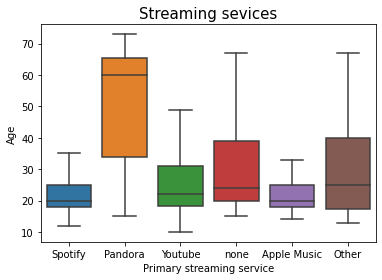

In [14]:
sns.boxplot(data= df, x= 'Primary streaming service', y = 'Age', showfliers = False )
plt.title("Streaming sevices", fontsize = 15)

In [15]:
s_df = df.groupby(['Primary streaming service'])
s_ages = []
s_ages.append(s_df['Age'].median())
s_ages

[Primary streaming service
 Apple Music    20.0
 Other          25.0
 Pandora        60.0
 Spotify        20.0
 Youtube        22.0
 none           24.0
 Name: Age, dtype: float64]

array([[<AxesSubplot:title={'center':'Hours per day'}>]], dtype=object)

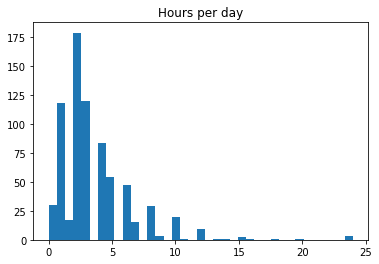

In [16]:
df.hist(['Hours per day'],bins = 'auto', grid = False)

In [17]:
df['Hours per day'].value_counts().loc[lambda x: x>100]

2.0    173
3.0    120
1.0    117
Name: Hours per day, dtype: int64

<AxesSubplot:ylabel='Composer'>

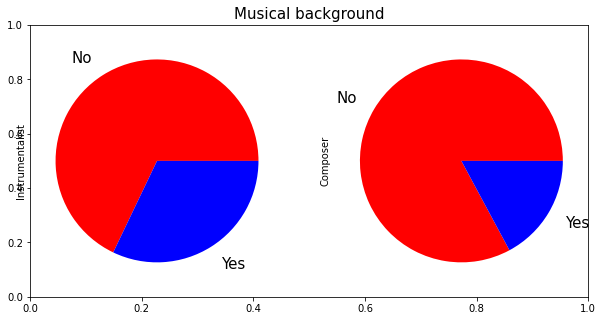

In [18]:
fig = plt.figure(figsize = (10,5))
plt.title("Musical background", fontsize = 15)

ax = fig.add_subplot(121)
inst = df['Instrumentalist'].value_counts()
inst.plot(kind = 'pie', colors = ['red', 'blue'], labeldistance = 1.2, fontsize = 15)

ax = fig.add_subplot(122)
comp = df['Composer'].value_counts()
comp.plot(kind = 'pie', colors= ['red', 'blue'], labeldistance = 1.2,fontsize = 15)

In [19]:
df.replace(['No','Yes'], [0, 1])

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1,1.0,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1,0.0,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0,1.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,Youtube,2.5,1.0,0.0,1.0,Jazz,1,1.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1,0.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,1.0,1.0,0.0,Rock,1,1.0,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,1.0,1.0,0.0,Pop,1,1.0,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other,6.0,1.0,0.0,1.0,Rap,1,0.0,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,1.0,1.0,0.0,Classical,0,0.0,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [20]:
df_age = df[["Anxiety","Depression","Insomnia","OCD","Age"]].copy()
df_age["CATE"] = pd.cut(df_age["Age"].tolist(),list(range(0, 100, 10)))

<AxesSubplot:xlabel='Anxiety', ylabel='Count'>

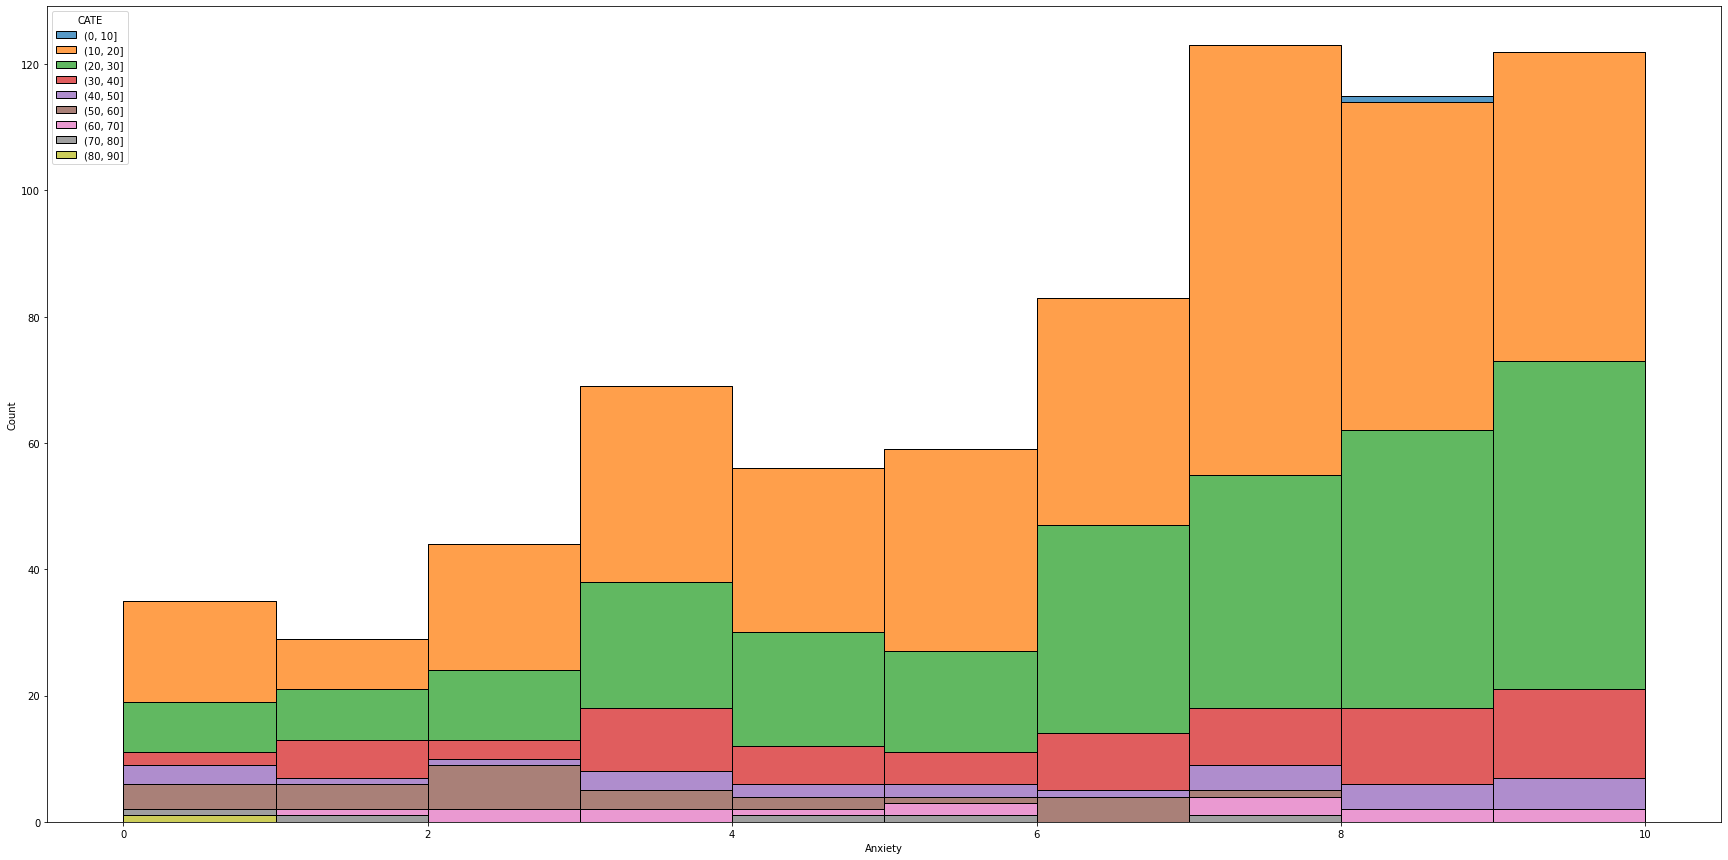

In [21]:
plt.figure(figsize = (30,15))
sns.histplot(df_age, x = "Anxiety", bins = 10,hue = 'CATE', multiple = "stack")

<AxesSubplot:xlabel='Depression', ylabel='Count'>

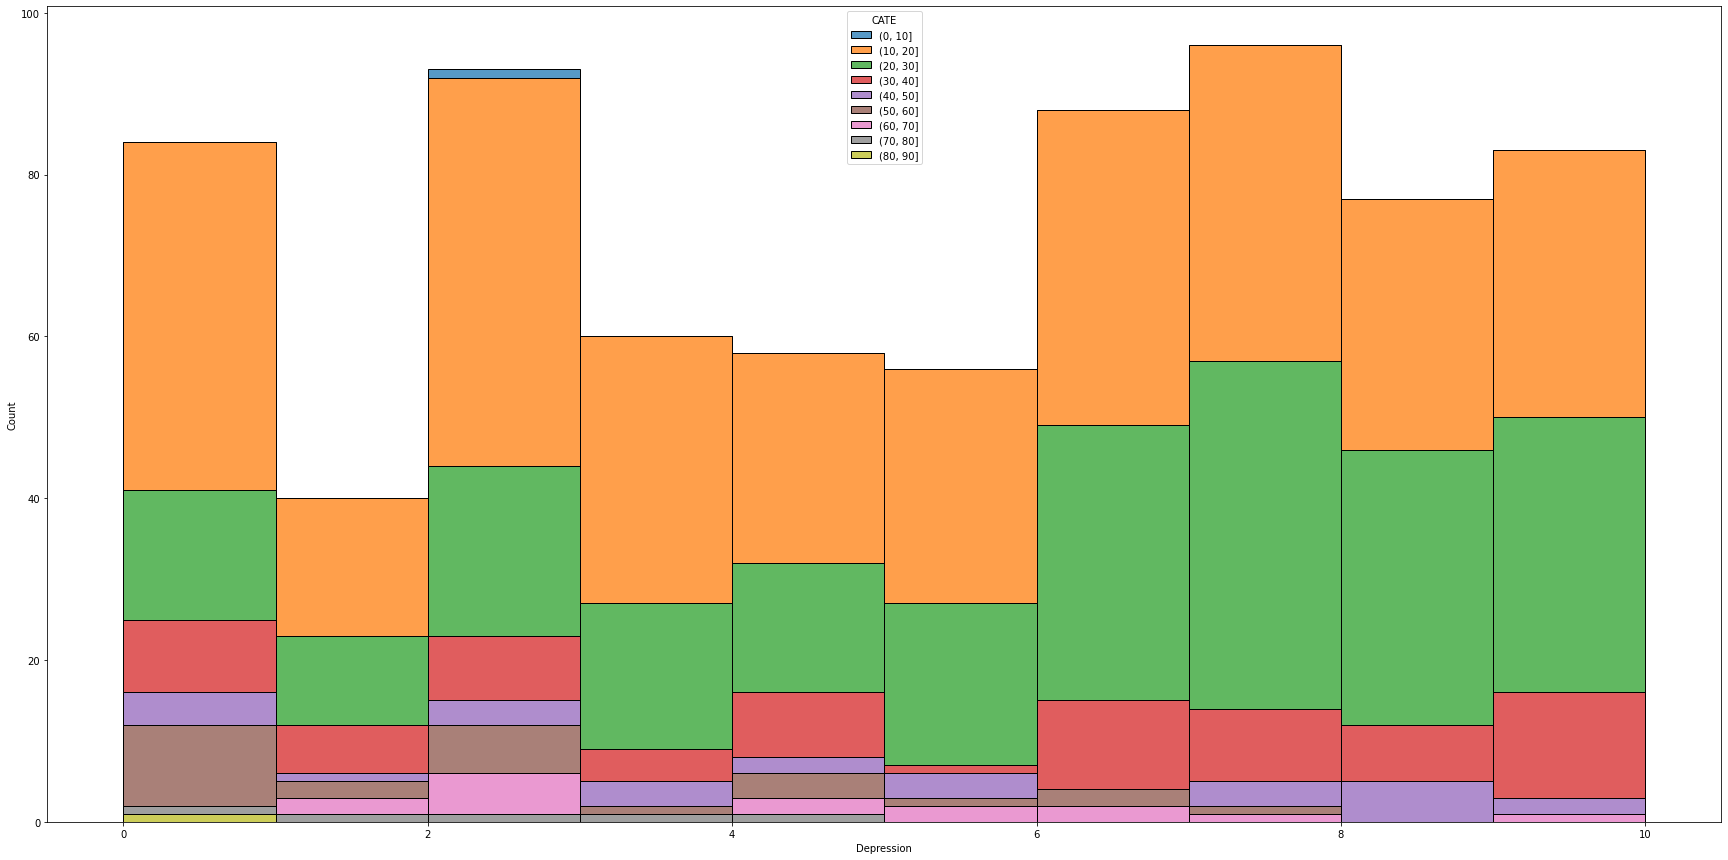

In [22]:
plt.figure(figsize = (30,15))
sns.histplot(df_age, x = "Depression", bins = 10,hue = 'CATE', multiple = "stack")

<AxesSubplot:xlabel='Insomnia', ylabel='Count'>

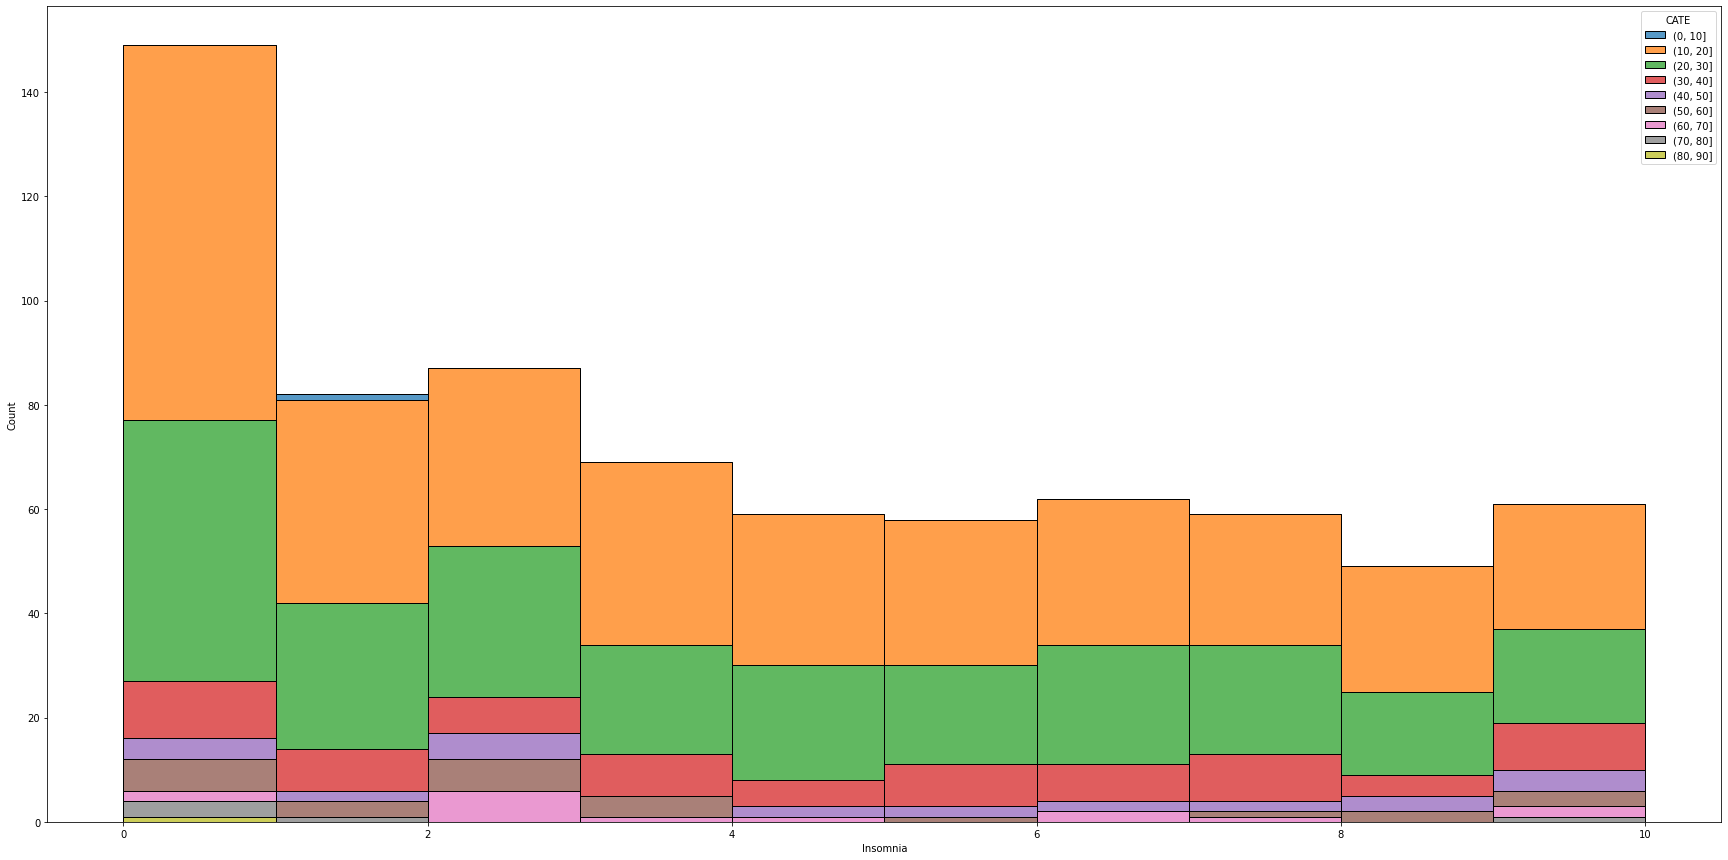

In [23]:
plt.figure(figsize = (30,15))
sns.histplot(df_age, x = "Insomnia", bins = 10,hue = 'CATE', multiple = "stack")

<AxesSubplot:xlabel='OCD', ylabel='Count'>

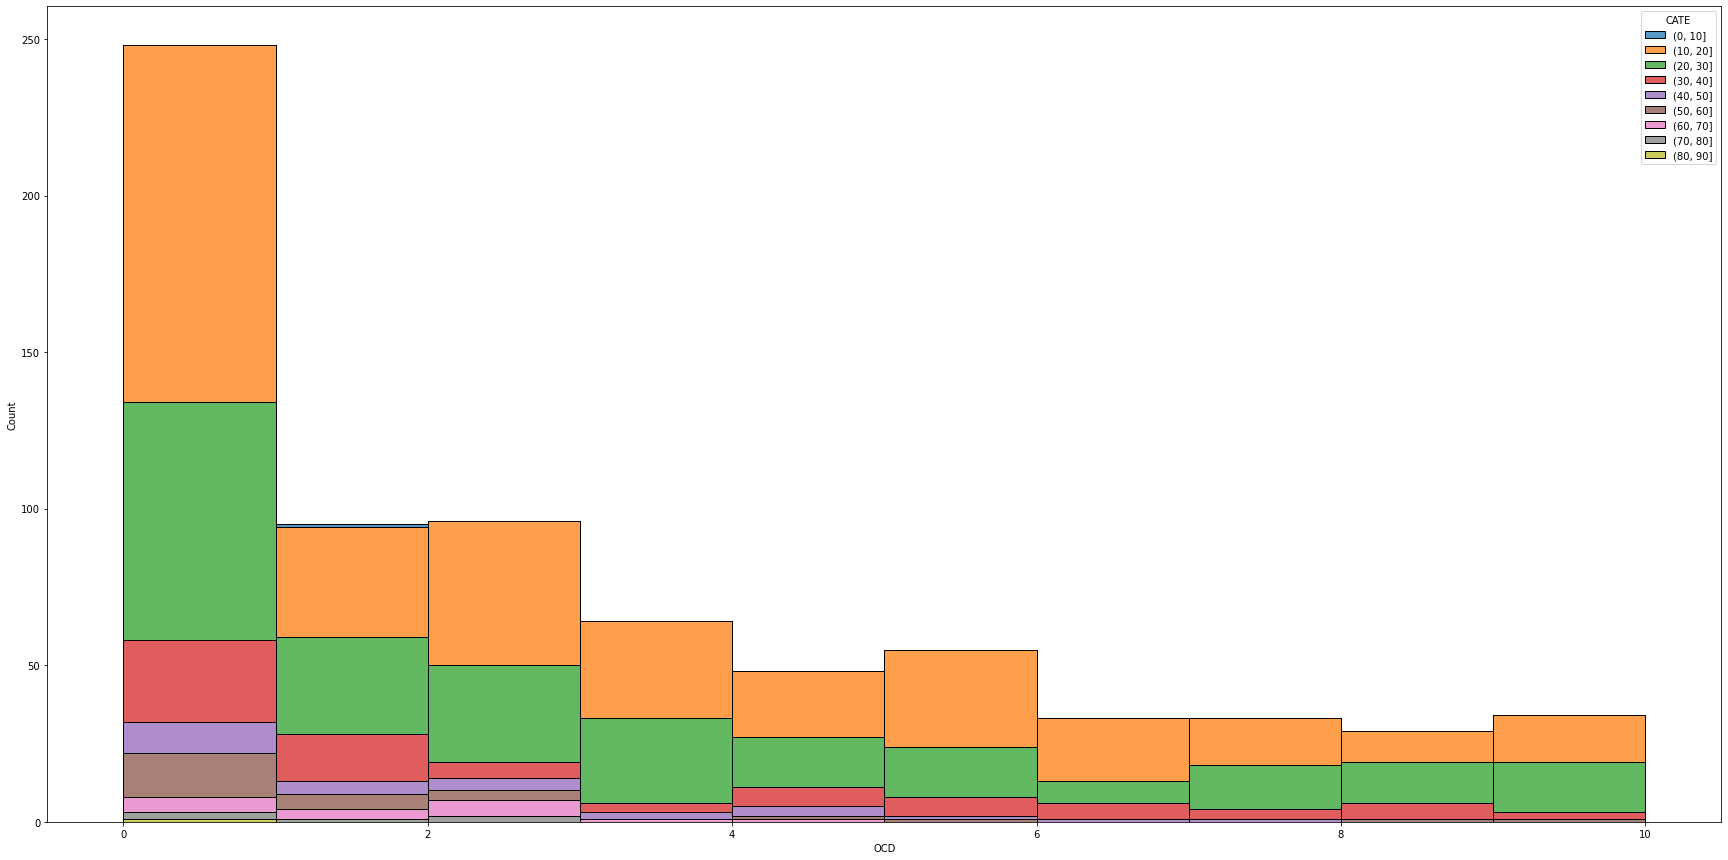

In [24]:
plt.figure(figsize = (30,15))
sns.histplot(df_age, x = "OCD", bins = 10,hue = 'CATE', multiple = "stack")

In [25]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]
for disorder in m_all:
    d_avg = str(round(df[disorder].mean(), 2))
    print(disorder + ' average: ' + d_avg)

Anxiety average: 5.84
Depression average: 4.8
Insomnia average: 3.74
OCD average: 2.64


C:\Users\TARUNB~1\AppData\Local\Temp/ipykernel_12688/526192488.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  anxiety_extreme = df.loc[(df['Anxiety'] > 8)].mean()[1]
C:\Users\TARUNB~1\AppData\Local\Temp/ipykernel_12688/526192488.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  depression_extreme = df.loc[(df['Depression'] > 8)].mean()[1]
C:\Users\TARUNB~1\AppData\Local\Temp/ipykernel_12688/526192488.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insomnia_extreme = df.loc[(

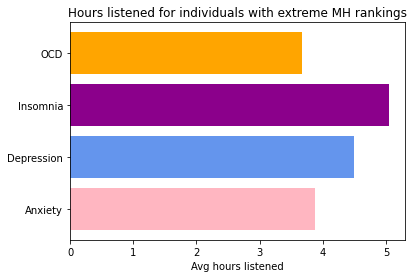

In [26]:
anxiety_extreme = df.loc[(df['Anxiety'] > 8)].mean()[1]
depression_extreme = df.loc[(df['Depression'] > 8)].mean()[1]
insomnia_extreme = df.loc[(df['Insomnia'] > 8)].mean()[1]
ocd_extreme = df.loc[(df['OCD'] > 8)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with extreme MH rankings")
plt.show()

C:\Users\TARUNB~1\AppData\Local\Temp/ipykernel_12688/3745387700.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  anxiety_extreme = df.loc[(df['Anxiety'] < 3)].mean()[1]
C:\Users\TARUNB~1\AppData\Local\Temp/ipykernel_12688/3745387700.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  depression_extreme = df.loc[(df['Depression'] < 3)].mean()[1]
C:\Users\TARUNB~1\AppData\Local\Temp/ipykernel_12688/3745387700.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insomnia_extreme = df.lo

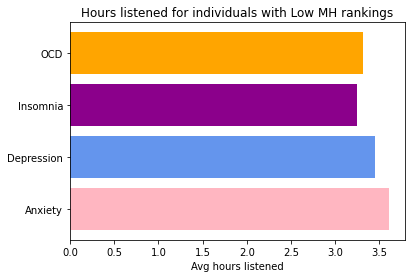

In [27]:
anxiety_extreme = df.loc[(df['Anxiety'] < 3)].mean()[1]
depression_extreme = df.loc[(df['Depression'] < 3)].mean()[1]
insomnia_extreme = df.loc[(df['Insomnia'] < 3)].mean()[1]
ocd_extreme = df.loc[(df['OCD'] < 3)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with Low MH rankings")
plt.show()

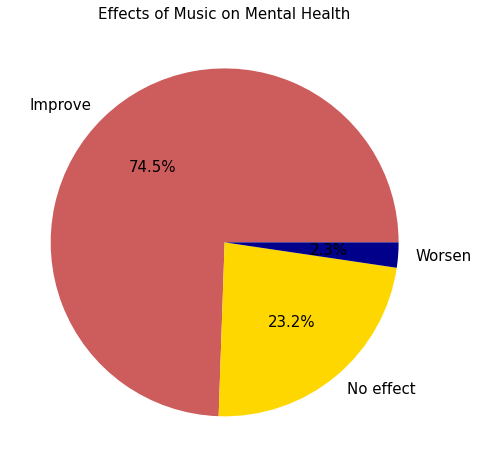

In [28]:
plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health', fontsize = 15)

effects = df['Music effects'].value_counts()
effects.plot(kind='pie', autopct='%1.1f%%', colors = ["indianred", "gold", "darkblue"], ylabel= '', figsize = (8,8), fontsize = 15);

Text(0, 0.5, ' ')

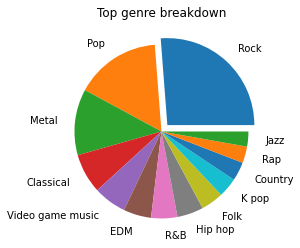

In [29]:
gen = df['Fav genre'].value_counts().loc[lambda x: x>10]
gen.plot(kind = 'pie', labeldistance = 1.2, explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0])
plt.title("Top genre breakdown")
plt.ylabel(" ")

Text(0.5, 1.0, 'Age distribution by Genre')

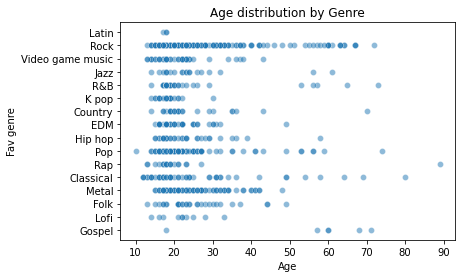

In [81]:
sns.scatterplot(data = df, y = "Fav genre", x = "Age", alpha = 0.5)
plt.title("Age distribution by Genre")